# Grover search: subset problem

We define a function named `subset_sum(i,j)` that returns the sum of the elements `i` and `j` of a list `set_`. We want to use a Grover search to find which `i` `j` combination led to a given value.

In [5]:
from qlasskit import qlassf, Qint, Qint3, Qlist, Parameter
from typing import Tuple


@qlassf
def subset_sum(
    ii: Tuple[Qint[2], Qint[2]], set_: Parameter[Qlist[Qint3, 4]]
) -> Qint[3]:
    return set_[ii[0]] + set_[ii[1]] if ii[0] != ii[1] else 0

Our quantum function `subset_sum` will be used as an oracle for a Grover search. For instance, here we want to find the input value that produce the value `7`. Since we know that there are at least two result (`(i,j)` and `(j,i)`), we set `n_matching=2`. We also bind the parameter `set_` with the set of numbers where we want to search the solution.

In [6]:
from qlasskit.algorithms import Grover

q_algo = Grover(subset_sum.bind(set_=[0, 5, 2, 3]), Qint3(7), n_matching=2)

Then we use our prefered framework and simulator for sampling the result; this is an example using `qiskit` with `aer_simulator`.

In the output histogram, it's now evident that the input leading to a value of `7` are the tuples `(1,2)` and `(2,1)` (5+2 and 2+5), aligning with our expectations.


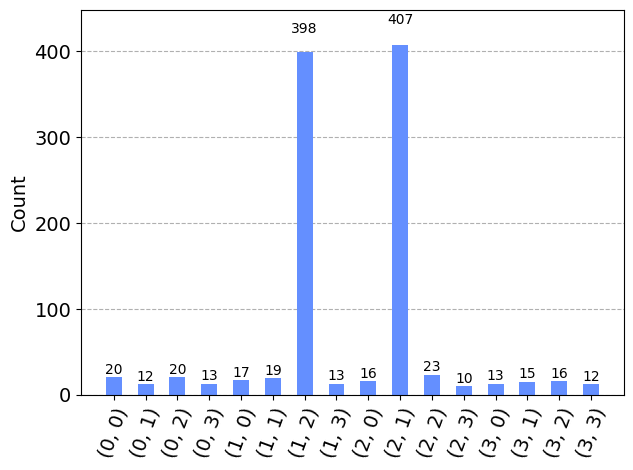

In [7]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

qc = q_algo.export("qiskit")
qc.measure_all()
simulator = AerSimulator()
circ = transpile(qc, simulator)
result = simulator.run(circ).result()
counts = result.get_counts(circ)

counts_readable = q_algo.decode_counts(counts)
plot_histogram(counts_readable)